<a href="https://colab.research.google.com/github/ashwinchelsea14/ML-start/blob/main/ML_Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/canada_per_capita_income.csv')
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


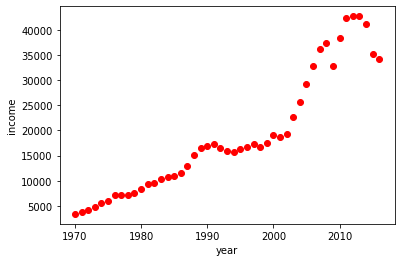

In [ ]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(df.year,df.income,c='r')

Text(0, 0.5, 'income')

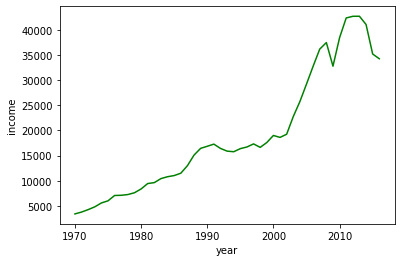

In [ ]:
plt.plot(df.year,df.income,'g-')
plt.xlabel('year')
plt.ylabel('income')

In [ ]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(df[['year']],df.income)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.predict([[2000]]) ##18987.38241

array([24719.39258996])

In [ ]:
reg.coef_

array([828.46507522])

In [ ]:
reg.intercept_

-1632210.7578554575

In [ ]:
828.46507522*2000+(-1632210.7578554575)

24719.39258454251

In [ ]:
reg.predict([[2020]])

array([41288.69409442])

In [ ]:
pip install word2number

  Created wheel for word2number: filename=word2number-1.1-cp36-none-any.whl size=5588 sha256=9f4087374668d31206e4a98328122d6cd648c2b2d4ef2caf8be91f5f0c949112
  Stored in directory: /root/.cache/pip/wheels/46/2f/53/5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
Successfully built word2number


In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from word2number import w2n

In [ ]:
df=pd.read_csv('/content/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
df.experience=df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [ ]:
import math
median_score=math.floor(df['test_score(out of 10)'].mean())
median_score

7

In [ ]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(median_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

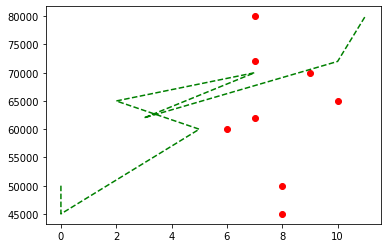

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['test_score(out of 10)'],df['salary($)'],c='r')
plt.plot(df['experience'],df['salary($)'],'g--')

In [ ]:
reg.predict([[12,10,10]])

array([93747.79628651])

In [ ]:
reg.predict([[2,9,6]])

array([53713.86677124])

In [ ]:
##saving model using pickle
import pickle

In [ ]:
with open('hiring_pickle','wb') as f:
    pickle.dump(reg,f)

In [ ]:
with open('hiring_pickle','rb') as f:
    hp=pickle.load(f)

In [ ]:
hp.predict([[2,9,6]])

array([53713.86677124])

In [ ]:
pip install joblib

In [ ]:
##saving model using sklearn joblib         ##for large numpy arrays
from sklearn.externals import joblib
joblib.dump(reg,"hiring_joblib")

['hiring_joblib']

In [ ]:
hj=joblib.load("hiring_joblib")

In [ ]:
hj.predict([[2,9,6]])

array([53713.86677124])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


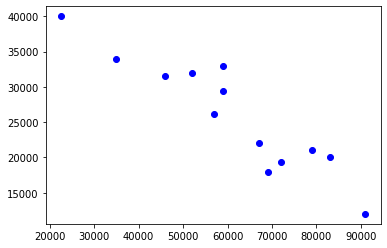

In [3]:
plt.scatter(df['Mileage'],df['Sell Price($)'],c='b')

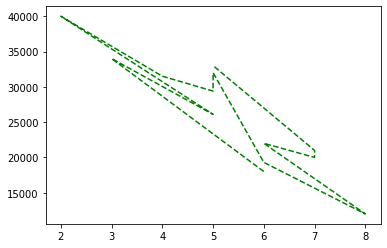

In [4]:
plt.plot(df['Age(yrs)'],df['Sell Price($)'],'g--')

In [5]:
dummies=pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [6]:
moddf=pd.concat([df,dummies],axis='columns')
moddf

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [19]:
finaldf=moddf.drop(['Car Model','Mercedez Benz C class'],axis='columns')
finaldf

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [20]:
X=finaldf.drop('Sell Price($)',axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [21]:
y=finaldf['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [11]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [13]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

In [14]:
model.score(X,y)

0.9417050937281083

In [26]:
X=finaldf[['Mileage','Age(yrs)']]
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [27]:
y=finaldf['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [61]:
##training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [62]:
X_train           ##use ',random_state=10' to keep the same samples below,in train_test_split()

,Mileage,Age(yrs)
3,22500,2
1,35000,3
4,46000,4
2,57000,5
6,52000,5
12,59000,5
0,69000,6
11,79000,7
7,72000,6
8,91000,8


In [63]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [64]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lr.predict(X_test)

array([23697.8090643 , 15938.83571937, 25805.97168394])

In [67]:
X_test

,Mileage,Age(yrs)
9,67000,6
10,83000,7
5,59000,5


In [71]:
lr.score(X_train,y_train)

0.8775643319470755